##### Copyright 2025 Google LLC.

In [ ]:
#@title Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
# https://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.

# Multimodal understanding with Hugging Face Transformers

<table align="left">
  <td>
    <a target="_blank" href="https://colab.research.google.com/github/google-gemini/gemma-cookbook/blob/main/Gemma/[Gemma_3n]Multimodal_understanding_with_HF.ipynb"><img src="https://www.tensorflow.org/images/colab_logo_32px.png" />Run in Google Colab</a>
  </td>
</table>

Gemma 3n is a generative AI model optimized for use in everyday devices, such as phones, laptops, and tablets.. This tutorial shows you how to get started running Gemma 3n using Hugging Face Transformers using Image + Audio input to generate text content. The Transformers Python library provides a API for accessing pre-trained generative AI models, including Gemma. For more information, see the [Transformers](https://huggingface.co/docs/transformers/en/index) documentation.

## Setup

Before starting this tutorial, complete the following steps:

* Get access to Gemma by logging into [Hugging Face](https://huggingface.co/google/gemma-3n-E4b-it) and selecting **Acknowledge license** for a Gemma model.
* Select a Colab runtime with sufficient resources to run
  the Gemma model size you want to run. [Learn more](https://ai.google.dev/gemma/docs/core#sizes).
* Generate a Hugging Face [Access Token](https://huggingface.co/docs/hub/en/security-tokens#how-to-manage-user-access-token) and use it to login from Colab.

This notebook will run on an NVIDIA T4 GPU using Gemma 3n E2B.\
But if you want to use Gemma 3n E4B, select L4 or A100.


In [ ]:
# Login into Hugging Face Hub
from huggingface_hub import notebook_login
notebook_login()

### Install Python packages

Install the Hugging Face libraries required for running the Gemma model and making requests.

In [ ]:
# Install a transformers version that supports Gemma 3n (>= 4.53)
!pip install "transformers>=4.53.0" "timm>=1.0.16"

## Define formatting helper functions

Create a chat helper to manage and display the conversations.

In [3]:
import torch

GEMMA_PATH = "google/gemma-3n-E2B-it" #@param ["google/gemma-3n-E2B-it", "google/gemma-3n-E4B-it"]
RESOURCE_URL_PREFIX = "https://raw.githubusercontent.com/google-gemini/gemma-cookbook/refs/heads/main/Demos/sample-data/"

from IPython.display import Audio, Image, Markdown, display

class ChatState():
  def __init__(self, model, processor):
    self.model = model
    self.processor = processor
    self.history = []

  def send_message(self, message, max_tokens=256):
    self.history.append(message)

    input_ids = self.processor.apply_chat_template(
        self.history,
        add_generation_prompt=True,
        tokenize=True,
        return_dict=True,
        return_tensors="pt",
    )
    input_len = input_ids["input_ids"].shape[-1]

    input_ids = input_ids.to(self.model.device, dtype=model.dtype)
    outputs = self.model.generate(
        **input_ids,
        max_new_tokens=max_tokens,
        disable_compile=True
    )
    text = self.processor.batch_decode(
        outputs[:, input_len:],
        skip_special_tokens=True,
        clean_up_tokenization_spaces=True
    )
    self.history.append({
        "role": "assistant",
        "content": [
            {"type": "text", "text": text[0]},
        ]
    })

    # display chat
    for item in message['content']:
      if item['type'] == 'text':
        formatted_prompt = "<font size='+1' color='brown'>🙋‍♂️<blockquote>\n" + item['text'] + "\n</blockquote></font>"
        display(Markdown(formatted_prompt))
      elif item['type'] == 'audio':
        display(Audio(item['audio']))
      elif item['type'] == 'image':
        display(Image(item['image']))

    formatted_text = "<font size='+1' color='teal'>🤖<blockquote>\n" + text[0] + "\n</blockquote></font>"
    display(Markdown(formatted_text))


## Load Model

In [4]:
from transformers import AutoModelForImageTextToText, AutoProcessor

processor = AutoProcessor.from_pretrained(GEMMA_PATH)
model = AutoModelForImageTextToText.from_pretrained(GEMMA_PATH, torch_dtype="auto", device_map="auto")

print(f"Device: {model.device}")
print(f"DType: {model.dtype}")

processor_config.json:   0%|          | 0.00/98.0 [00:00<?, ?B/s]

chat_template.jinja:   0%|          | 0.00/1.63k [00:00<?, ?B/s]

preprocessor_config.json:   0%|          | 0.00/1.12k [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/1.20M [00:00<?, ?B/s]

tokenizer.model:   0%|          | 0.00/4.70M [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/33.4M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/769 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/3.96k [00:00<?, ?B/s]

model.safetensors.index.json:   0%|          | 0.00/159k [00:00<?, ?B/s]

Fetching 3 files:   0%|          | 0/3 [00:00<?, ?it/s]

model-00001-of-00003.safetensors:   0%|          | 0.00/3.08G [00:00<?, ?B/s]

model-00003-of-00003.safetensors:   0%|          | 0.00/2.82G [00:00<?, ?B/s]

model-00002-of-00003.safetensors:   0%|          | 0.00/4.98G [00:00<?, ?B/s]

Loading checkpoint shards:   0%|          | 0/3 [00:00<?, ?it/s]

generation_config.json:   0%|          | 0.00/215 [00:00<?, ?B/s]

Device: cuda:0
DType: torch.bfloat16


## Image-in: Captioning

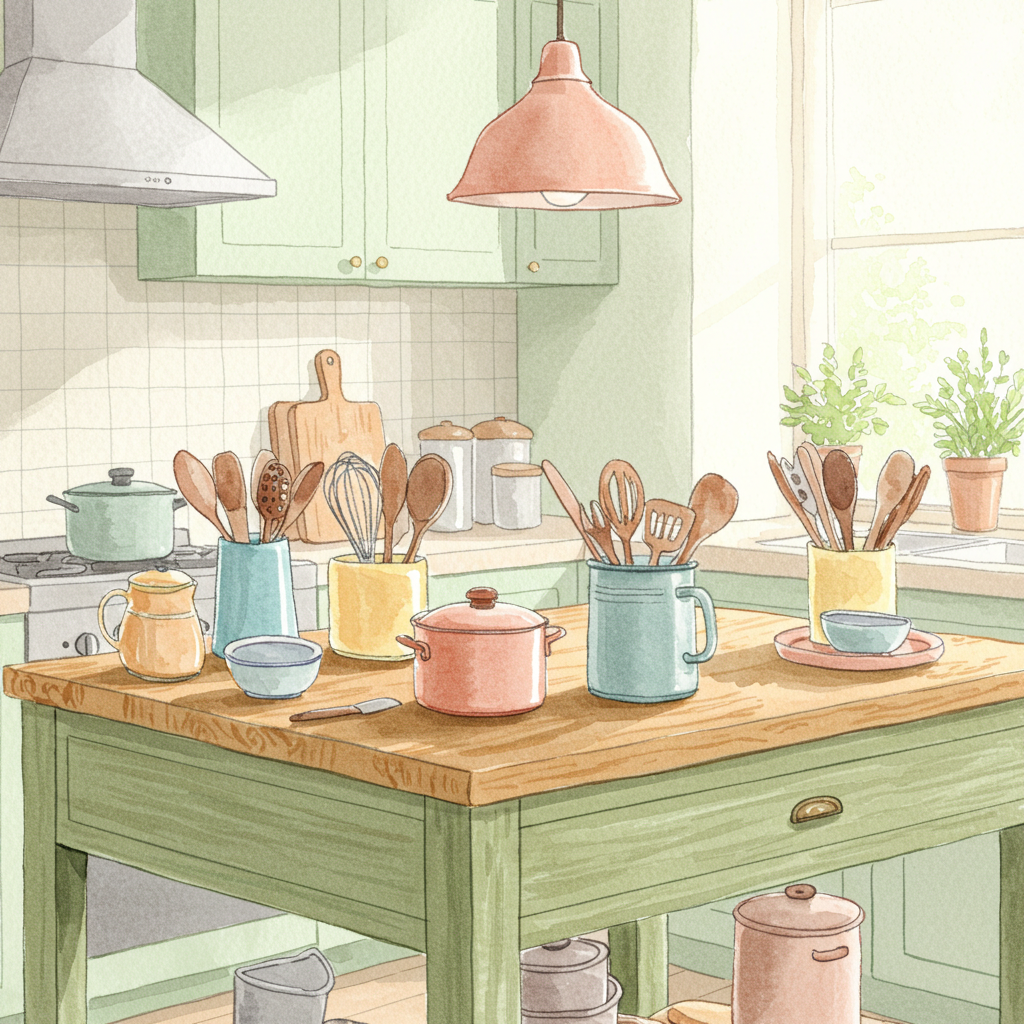

<font size='+1' color='brown'>🙋‍♂️<blockquote>
describe the image in detail
</blockquote></font>

<font size='+1' color='teal'>🤖<blockquote>
The image is a top-down, slightly tilted illustration depicting a bright and cozy kitchen scene. The perspective is from above, looking down onto a wooden countertop laden with various kitchen utensils and cookware. 

The countertop is a warm, light brown wood with a slightly rustic texture. It's positioned slightly off-center, angled towards the right side of the frame. A light green wooden base supports the countertop, and it features a simple, round handle on the right. 

On the countertop, a colorful assortment of items is arranged. There are several pots and pans in different colors: a light blue pot, a reddish-brown pot, a yellow pot, and a light pink pot.  Alongside these, there's a collection of wooden spoons, whisks, spatulas, and other cooking utensils of various sizes and shapes. These are neatly organized in small, colorful holders – light blue, yellow, and beige.

The kitchen itself is softly rendered. A light green cabinet with two doors is visible on the left side, featuring simple, round knobs. Above the cabinet, a pale green wall extends towards the top of the frame. A white tiled backsplash runs along the wall behind the countertop.

A tall, pale pink and white kitchen light fixture hangs from the ceiling on the left side, casting a soft glow on the scene. A large window is visible on the far left, letting in bright natural light that illuminates the kitchen. 

In the background, partially visible, are other kitchen elements – possibly a stove or oven, also rendered in a muted, pastel style. A small potted plant with green leaves sits near the edge of the countertop, adding a touch of freshness to the scene. 

The overall style of the illustration is whimsical and charming, with soft colors and gentle lines, suggesting a warm and inviting atmosphere.
</blockquote></font>

In [5]:
prompt = {
    "role": "user",
    "content": [
        {"type": "image", "image": f"{RESOURCE_URL_PREFIX}kitchen_painting.jpg"},
        {"type": "text", "text": "describe the image in detail"},
    ]
}

chat = ChatState(model, processor)
chat.send_message(prompt, max_tokens=512)

## Audio + Image : Tour Guide (image in + audio question)

This section demonstrates how to leverage Gemma 3n's multimodal input capability to assist as a Tour Guide. Take a picture of a famous landmark and ask any questions. Gemma 3n will act as your helpful tour guide.


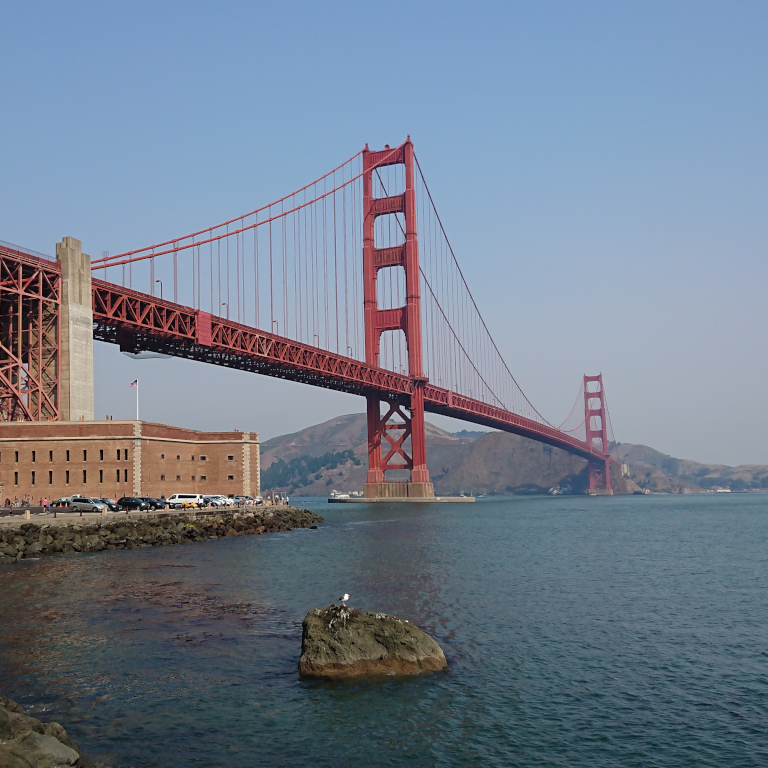

<font size='+1' color='teal'>🤖<blockquote>
The image shows the **Golden Gate Bridge** in San Francisco, California. 

It's a suspension bridge known for its iconic orange color, which helps to make it visible in the fog. The bridge connects San Francisco to Marin County.
</blockquote></font>

In [7]:
prompt = {
  "role": "user",
  "content": [
    {"type": "image", "image": f"{RESOURCE_URL_PREFIX}GoldenGate.png"},
    {"type": "audio", "audio": f"{RESOURCE_URL_PREFIX}tour_en.wav"},
  ]
}

chat = ChatState(model, processor)
chat.send_message(prompt)

## Try this by yourself

In [ ]:
!pip install ipywebrtc

Press the circle button and start speaking. Click the circle button again when you are finshed. The widget will immediately begin to play back what it captured.

In [ ]:
from google.colab import output
output.enable_custom_widget_manager()

from ipywebrtc import AudioRecorder, CameraStream

camera = CameraStream(constraints={'audio': True,'video':False})
recorder = AudioRecorder(stream=camera)
recorder

Convert webm file to wav format that PyTorch can understand.

In [ ]:
with open('/content/recording.webm', 'wb') as f:
    f.write(recorder.audio.value)
!ffmpeg -i /content/recording.webm /content/recording.wav -y

In [ ]:
prompt = {
  "role": "user",
  "content": [
    {"type": "image", "image": f"{RESOURCE_URL_PREFIX}GoldenGate.png"},
    {"type": "audio", "audio": "/content/recording.wav"},
  ]
}
chat = ChatState(model, processor)
chat.send_message(prompt)

## Next steps

Build and explore more with Gemma models:

* [Fine-tune Gemma for text tasks using Hugging Face Transformers](https://ai.google.dev/gemma/docs/core/huggingface_text_finetune_qlora)
* [Fine-tune Gemma for vision tasks using Hugging Face Transformers](https://ai.google.dev/gemma/docs/core/huggingface_vision_finetune_qlora)
* [Perform distributed fine-tuning and inference on Gemma models](https://ai.google.dev/gemma/docs/core/distributed_tuning)
* [Use Gemma open models with Vertex AI](https://cloud.google.com/vertex-ai/docs/generative-ai/open-models/use-gemma)
* [Fine-tune Gemma using Keras and deploy to Vertex AI](https://github.com/GoogleCloudPlatform/vertex-ai-samples/blob/main/notebooks/community/model_garden/model_garden_gemma_kerasnlp_to_vertexai.ipynb)